# Data Analysis of Online Food Delivery Trends (FoodHub Case Study)

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [5]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [6]:
#Import dataset
pd.read_csv('foodhub_order 19.56.26.csv')

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [8]:
#saving dataset into a variable
df = pd.read_csv('foodhub_order 19.56.26.csv')

In [9]:
# Write your code here to view the first 5 rows
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### How many rows and columns are present in the data? 

In [10]:
# Checking the shape of the dataset
df.shape

(1898, 9)

#### Observations: There are 1898 rows and 9 columns.


### datatypes of the different columns in the dataset? 

In [11]:
# checking data types of different columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


Observations: We can see that the data type of each column is correct, in which only the column cost_of_the_order is a float because it contains numbers with decimal point.

### Are there any missing values in the data? If yes, treat them using an appropriate method. 

In [12]:
# checking for missing values in the dataset
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: There are no missing values


###  Checking the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? 

In [13]:
# Checking statistical analysis
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
The minimum time it takes for food to be prepared once an order is placed is 20min.
The average time it takes for food to be prepared once an order is placed is 27min.
The maximum time it takes for food to be prepared once an order is placed is 35min.

### How many orders are not rated? 

In [14]:
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:
736 orders are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### Exploring all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

### Order ID

In [15]:
# checking unique order_id
df['order_id'].nunique()

1898

### Customer ID

In [16]:
# checking unique customer_id
df['customer_id'].nunique()

1200

### Restaurant name

In [17]:
# checking unique restaurant_name
df['restaurant_name'].nunique()

178

### Cuisine type

In [18]:
# checking unique cuisine_type
df['cuisine_type'].nunique()

14

<Axes: xlabel='cuisine_type', ylabel='count'>

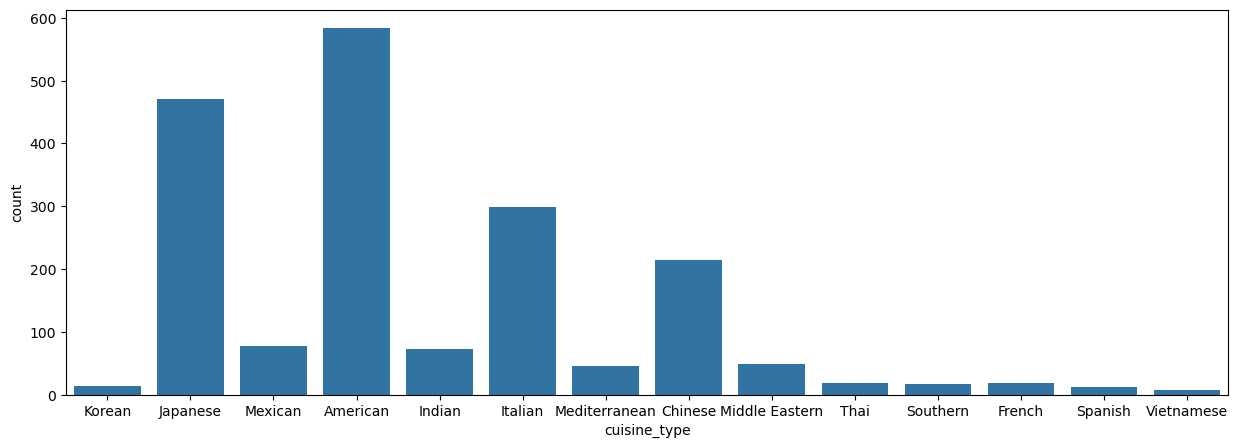

In [19]:
#countplot for cuisine type
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type')

### Cost of order

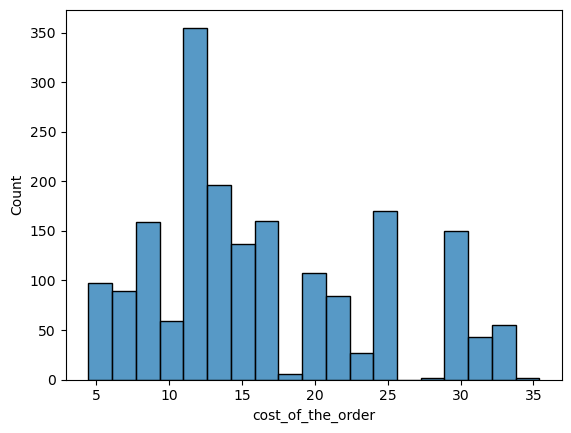

In [20]:
#Histogram for cost of order
sns.histplot(data=df,x='cost_of_the_order') 
plt.show()

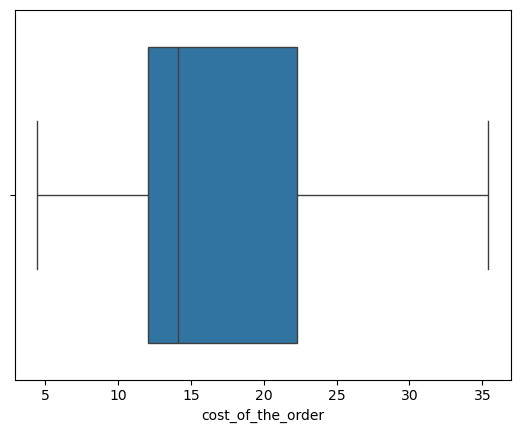

In [21]:
#Boxplot for cost of order
sns.boxplot(data=df,x='cost_of_the_order') 
plt.show()

### Day of the week

In [22]:
# checking unique values
df['day_of_the_week'].nunique()

2

<Axes: xlabel='day_of_the_week', ylabel='count'>

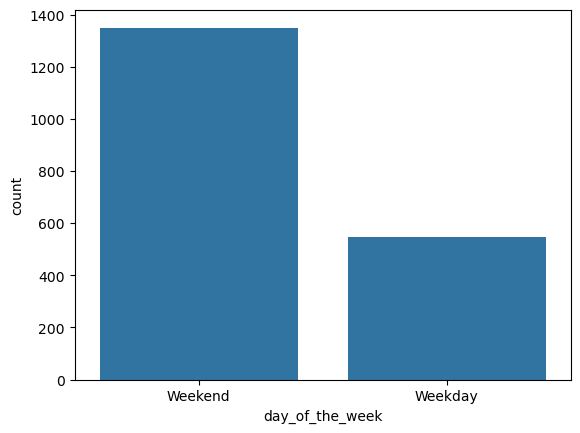

In [23]:
#Bar graph for day of the week
sns.countplot(data = df, x = 'day_of_the_week')

### Rating

In [24]:
# checking unique values
df['rating'].nunique()

4

<Axes: xlabel='rating', ylabel='count'>

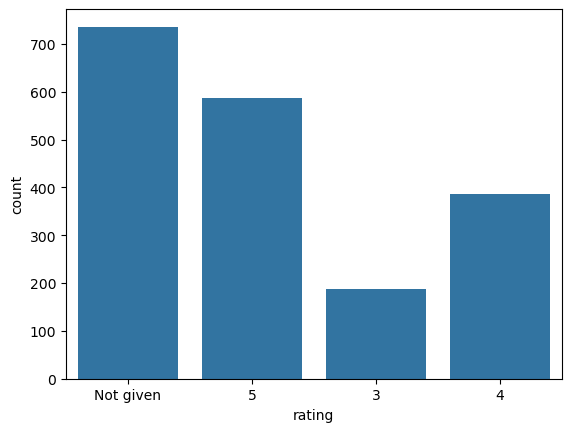

In [25]:
#Bar graph for rating column
sns.countplot(data = df, x = 'rating')

### Food preparation time

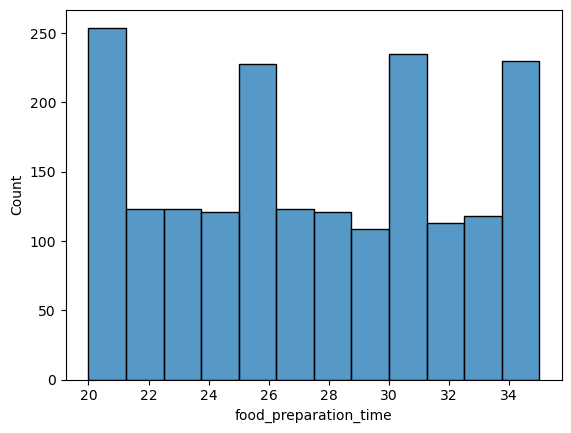

In [26]:
#Histogram for food preparation time
sns.histplot(data=df,x='food_preparation_time')
plt.show()

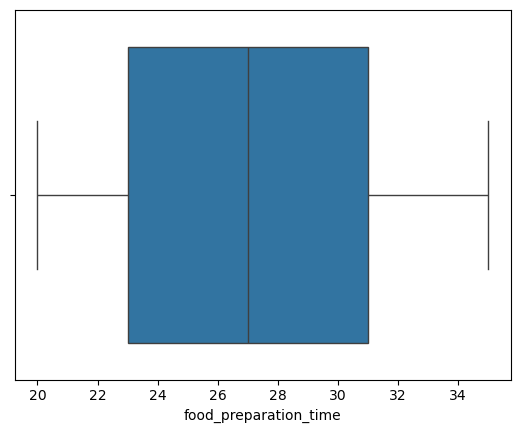

In [27]:
#Boxplot for food preparation time
sns.boxplot(data=df,x='food_preparation_time') 
plt.show()

### Delivery Time

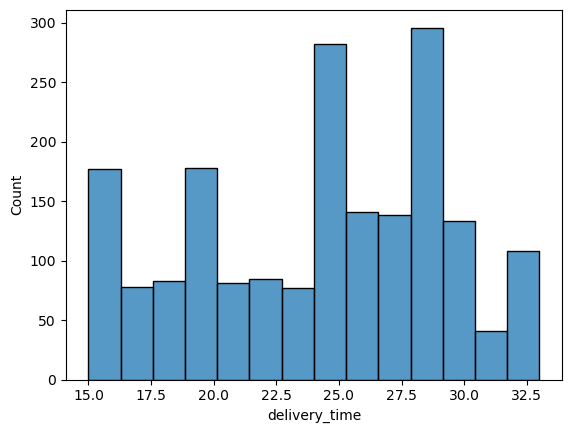

In [28]:
#Histogram for delivery time
sns.histplot(data=df,x='delivery_time') 
plt.show()

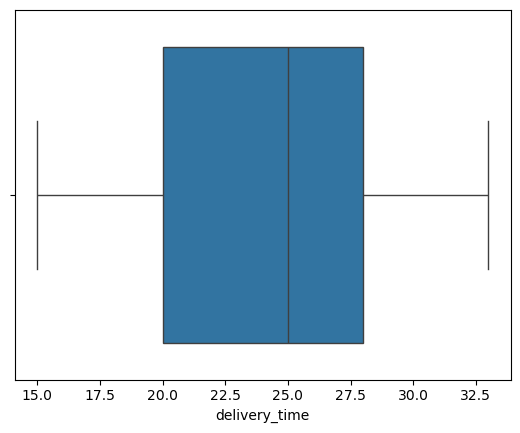

In [29]:
#Boxplot for delivery time
sns.boxplot(data=df,x='delivery_time') 
plt.show()

###  Which are the top 5 restaurants in terms of the number of orders received? 

In [30]:
# Get top 5 restaurant with the highest number of order
df['restaurant_name'].value_counts().head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:
Shake shack has the hihest number of order
Parm has the least number of orders in the top 5

###  Which is the most popular cuisine on weekends? 

In [33]:
# checking for the most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

#### Observations:
American cuisine is the most popular on weekends
Vietnamese cuisine is the least popular on weekends

###  What percentage of the orders cost more than 20 dollars? 

In [32]:
# checking for percentage of orders that cost more than 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] 

print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


#### Observations:
The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %

###  What is the mean order delivery time? 

In [34]:
# checking for the mean order of delivery time
mean_order_delivery_time = df['delivery_time'].mean()

print('The mean delivery time for this dataset is', round(mean_order_delivery_time, 2), 'minutes')


The mean delivery time for this dataset is 24.16 minutes


#### Observations: The mean delivery time for this dataset is 24.16 minutes


### The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. 

In [35]:
# getting the id of the top 3 most frequent customers
df['customer_id'].value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations: 


### Multivariate Analysis

### Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) 


### Cuisine vs Cost of the order

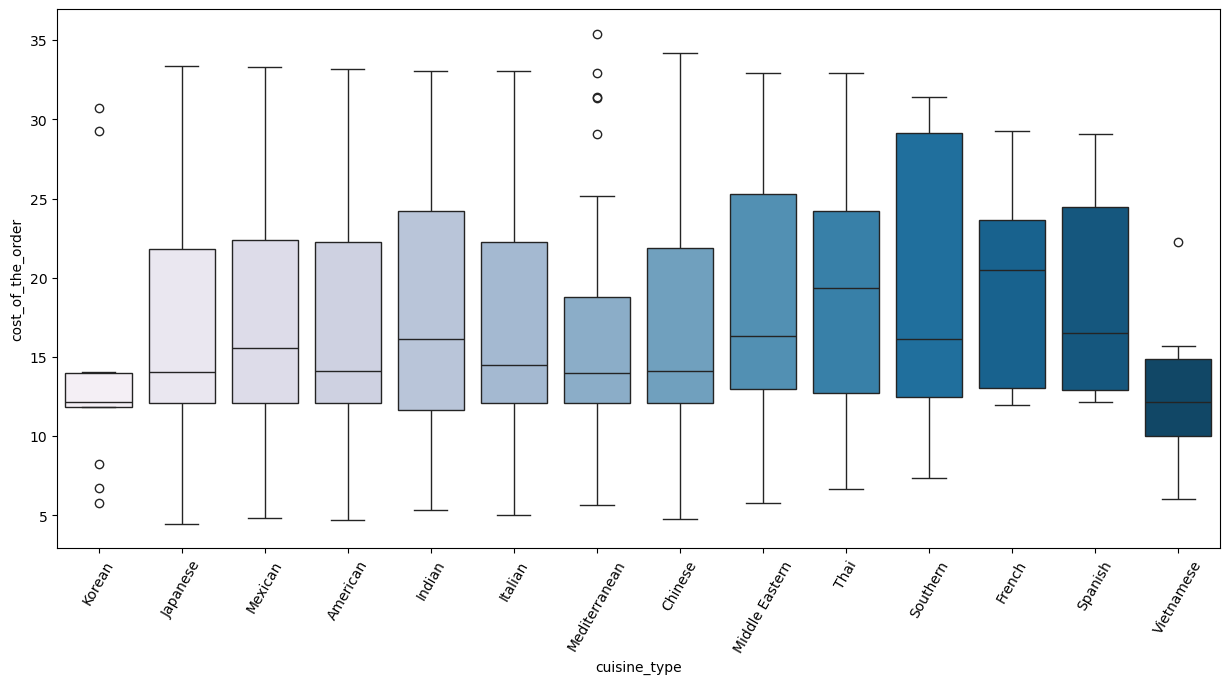

In [36]:
# Relationship between Cuisine and Cost of the order
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

### Cuisine vs Food Preparation time

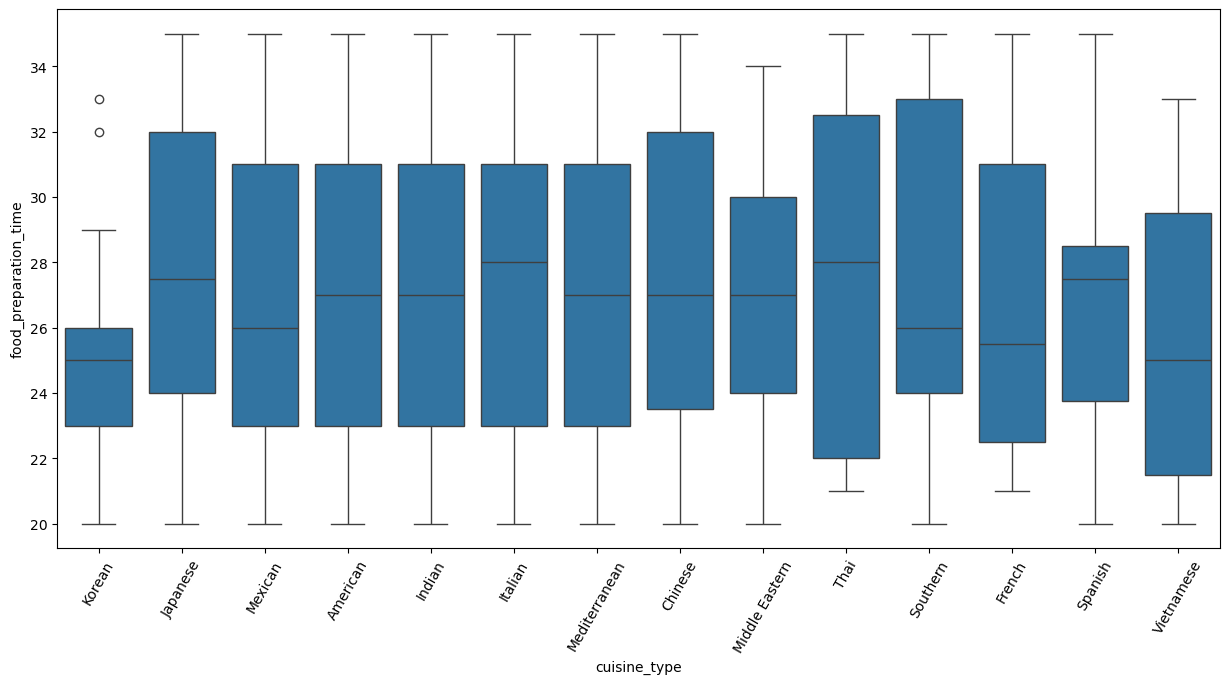

In [37]:
# Relationship between Cuisine and Food Preparation time
plt.figure(figsize=(15,7))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df)
plt.xticks(rotation=60)
plt.show()

### Days of the week vs Delivery time

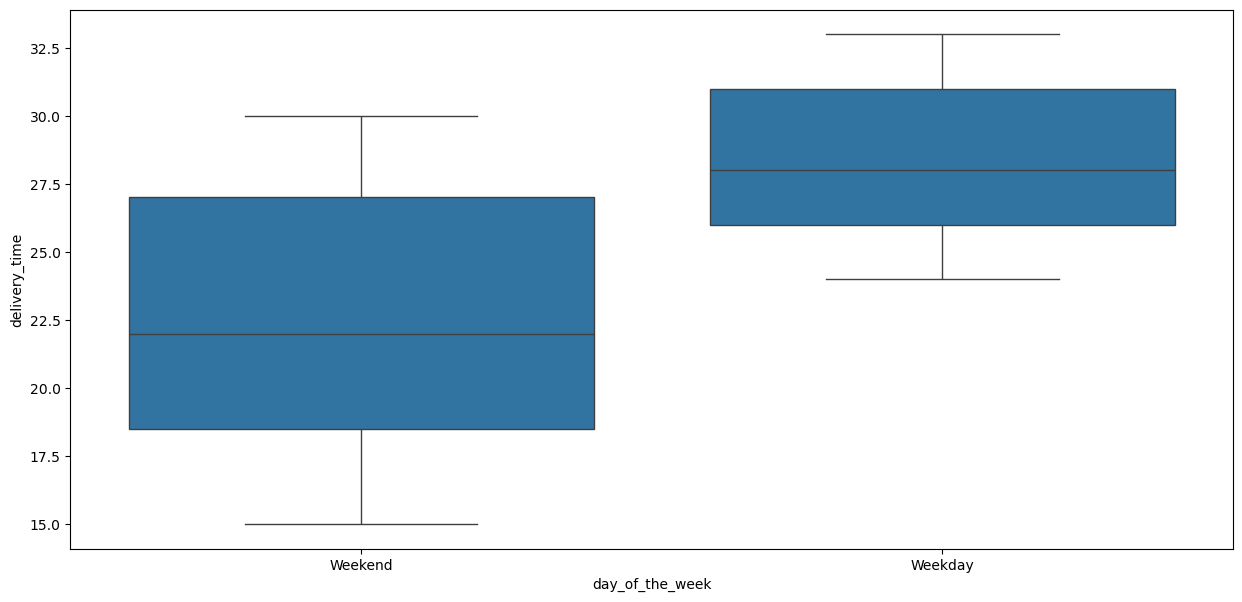

In [38]:
# Relationship between Days of the week and Delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df) 
plt.show()

### Rating vs Delivery Time

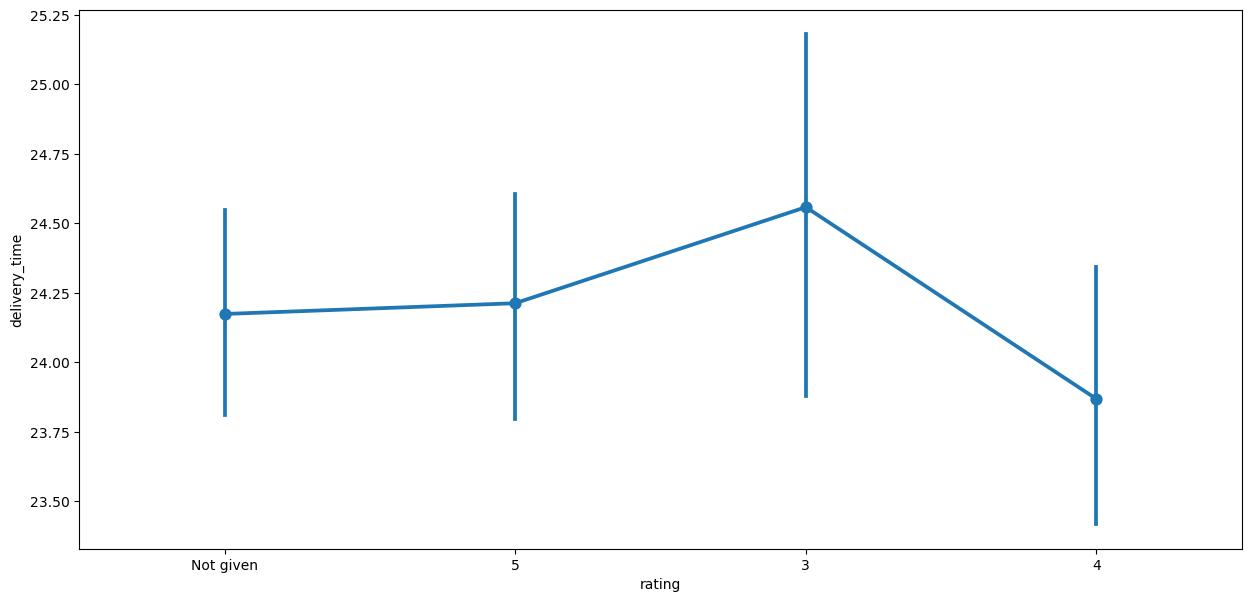

In [39]:
# Relationship between Rating and Delivery Time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

### Rating vs Food preparation time

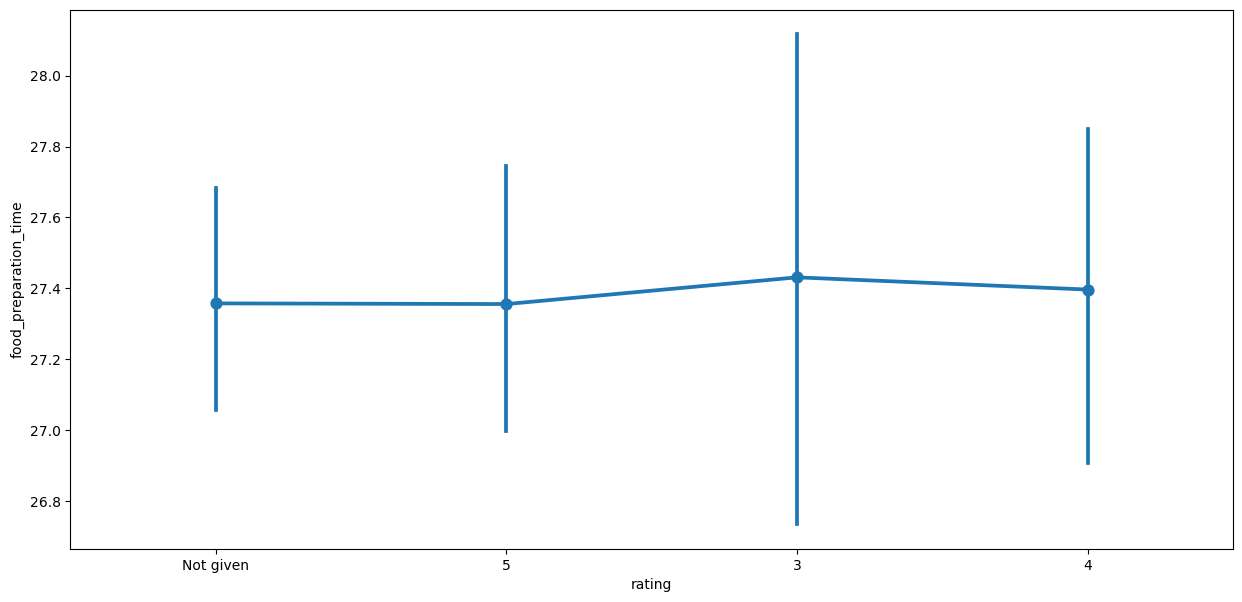

In [40]:
# Relationship between Rating and Food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x='rating', y='food_preparation_time', data=df)   
plt.show()

### Rating vs Cost of Order

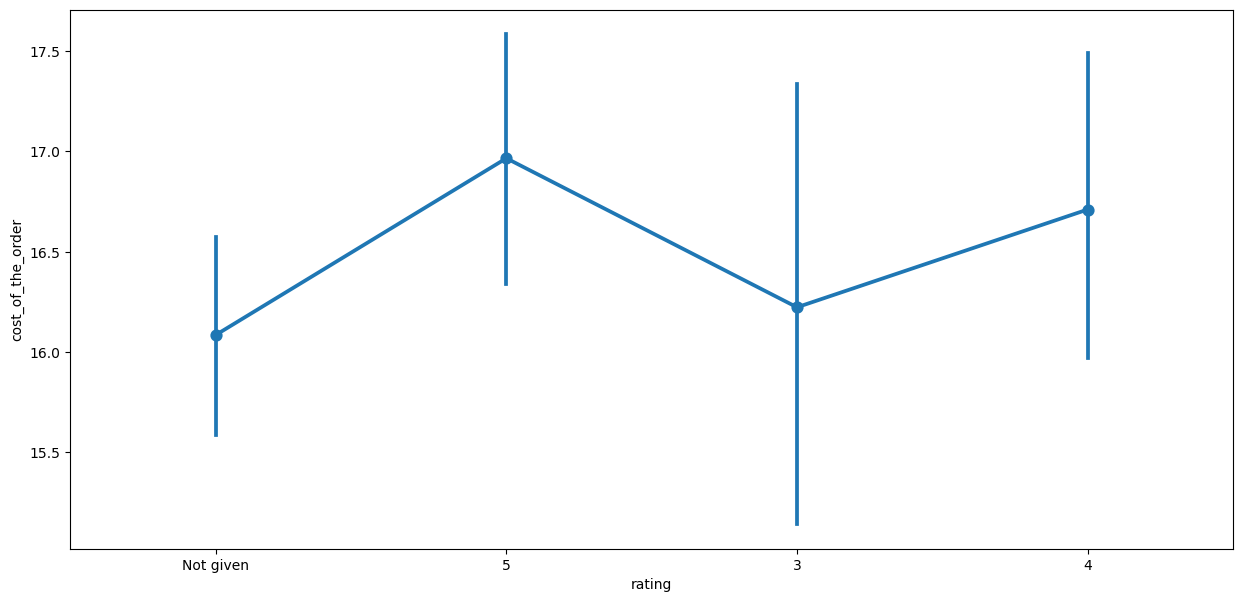

In [41]:
# Relationship between Rating and Cost of Order
plt.figure(figsize=(15, 7))
sns.pointplot(x='rating', y='cost_of_the_order', data=df)   
plt.show()

### Correlation among Variables

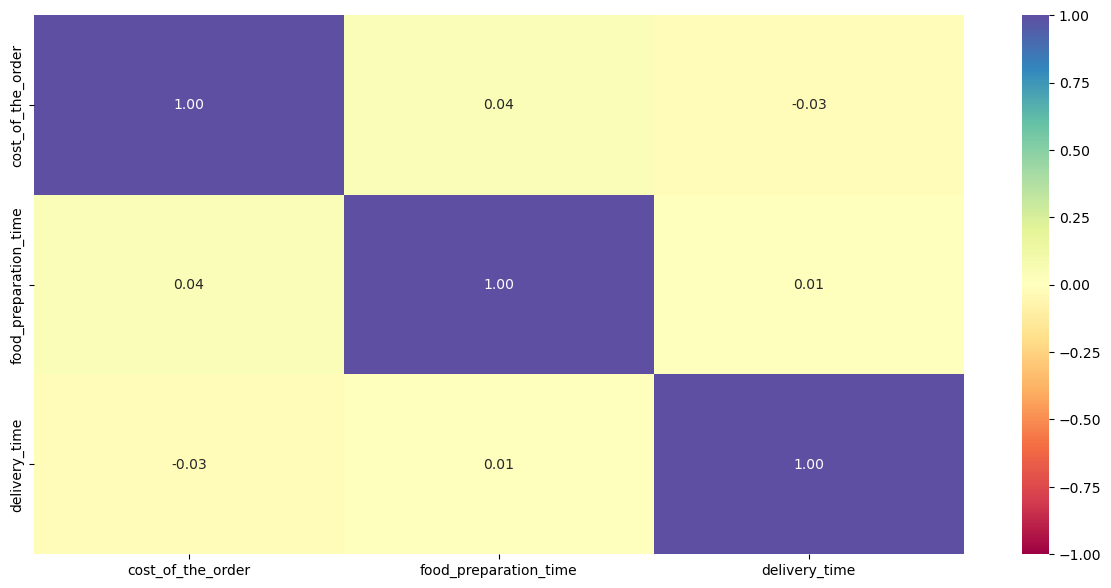

In [42]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. 

In [43]:
# Convert 'rating' to numeric, turn errors into NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by restaurant and calculate rating count and average
promotional_restaurants = df.groupby('restaurant_name').agg(
    rating_count=('rating', 'count'),
    average_rating=('rating', 'mean')
).reset_index()

# Filter based on the promotional criteria
qualified_restaurants = promotional_restaurants[
    (promotional_restaurants['rating_count'] > 50) &
    (promotional_restaurants['average_rating'] > 4)
]

# Display the qualified restaurants
print(qualified_restaurants)


               restaurant_name  rating_count  average_rating
20   Blue Ribbon Fried Chicken            64        4.328125
21           Blue Ribbon Sushi            73        4.219178
136                Shake Shack           133        4.278195
153          The Meatball Shop            84        4.511905


#### Observations:
There are only four restaurant that have a rating count of more than 50 that the average rating is greater than 4.

### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. 

In [44]:
def calculate_revenue(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0

# Apply the revenue function to each order
df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)

# Calculate total net revenue
net_revenue = df['revenue'].sum()

print('The total net revenue generated by the company is $', round(net_revenue, 2))


The total net revenue generated by the company is $ 6166.3


#### Observations: The total net revenue generated by the company is $ 6166.3


### The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) 

In [45]:
# new column for total time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Count total orders
total_orders = len(df)

# Count orders taking more than 60 minutes
orders_above_60 = len(df[df['total_time'] > 60])

# Calculate percentage
percentage = (orders_above_60 / total_orders) * 100

print("Percentage of orders taking more than 60 minutes:", round(percentage, 2), "%")


Percentage of orders taking more than 60 minutes: 10.54 %


#### Observations: Percentage of orders taking more than 60 minutes: 10.54 %



### The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? 

In [46]:
df.groupby('day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
The mean delivery time is approximately 6 minutes faster on weekends compared to weekdays.

### Conclusion and Recommendations

### What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) 

### Conclusions:
1. Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm are the most popular restaurant according to number of order received.    
2. American, Japanese, Italian, and chinese are the most popular cuisines on weekend.
3. Weekends saw a higher variety and volume of cuisine orders, suggesting an opportunity for increased sales through promotions.
4. High-rated cuisines were typically those with fast preparation, consistent quality, and good packaging.
5. Poor ratings were associated with long delivery times and inconsistent service, especially for underperforming cuisine types.
6. Weekends had shorter average delivery times despite higher order volumes.
7. Weekdays experienced longer delivery times, likely due to traffic and fewer delivery personnel.



### Recommendations:

1. Promote High-Performing Cuisines
  * Launch targeted campaigns for cuisines with consistently high ratings.
  * Offer discounts or loyalty points to drive repeat purchases in these categories.
2. Improve Low-Rated Cuisine Experiences
  * Identify restaurants that consistently underperform in ratings.
  * Provide operational training or incentives to improve their service.
  * Consider removing vendors that fall below a quality threshold.
3. Optimize Delivery Performance
  * Implement predictive analytics to better manage delivery staff scheduling.
  * Use real-time tracking and alerts to reduce weekday delivery time delays.
4. Boost Customer Feedback Collection
  * Encourage reviews through in-app nudges and rewards for feedback.
  * Analyze feedback regularly to catch service quality issues early.
5. Spotlight High-Rated Restaurants
  * Award a “Top Rated” badge to restaurants with: An average rating of >4, and at least 50 reviews.